In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [8]:
colName=["Energy", "Veff", "Err"]
new = pd.read_csv("/users/PCON0003/cond0068/ARA/AraSim/veffs/Veff_noTransM.txt",names=colName)
old = pd.read_csv("/users/PCON0003/cond0068/ARA/AraSim/veffs/Veff_std.txt",names=colName)
# pyrex = pd.read_csv("/users/PCON0003/cond0068/ARA/AraRoot/analysis/ARA_analysis/veff/pyrex_veff.csv",names=colName)

In [9]:
new=new.sort_values(by='Energy')
old=old.sort_values(by='Energy')
# pyrex["Energy"]=pyrex["Energy"].astype(str).astype(float)
# old.to_csv("AraSim_veff_proposal.csv", index=False)
old=old.reset_index()
new=new.reset_index()

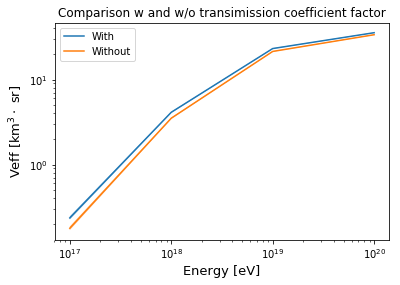

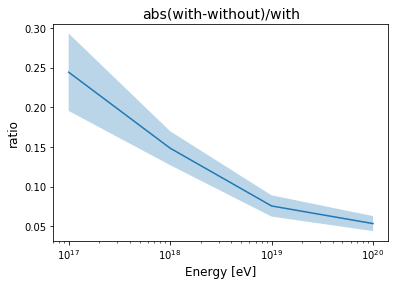

In [12]:
plt.figure(0)

plt.loglog(old["Energy"], old["Veff"], label="With")
plt.plot(new["Energy"], new["Veff"], label="Without")

plt.fill_between(old["Energy"],old["Veff"]-old["Err"],old["Veff"]+old["Err"], alpha=0.5)
plt.fill_between(new["Energy"],new["Veff"]-new["Err"],new["Veff"]+new["Err"], alpha=0.5)
# plt.yscale("log")
# plt.xscale("log")
plt.xlabel("Energy [eV]",fontsize=13)
plt.title("Comparison w and w/o transimission coefficient factor", fontsize=12)
plt.ylabel("Veff [km$^3 \cdot$ sr]",fontsize=13)
plt.legend()
plt.savefig("./veff_comparison.png", dpi=200)
# plt.gca().set_aspect('equal', adjustable='box')

plt.figure(1)

plt.plot(new["Energy"],abs(new["Veff"]-old["Veff"])/old["Veff"])
ratio = abs(new["Veff"]-old["Veff"])/old["Veff"]
#err_ratio = np.sqrt((new["Err"]**2+old["Err"]**2)/(new["Veff"]-old["Veff"])**2 + (old["Err"] /old["Veff"])**2)
err_ratio = np.sqrt((new["Err"]/old["Veff"])**2+(new["Veff"]*old["Err"]/old["Veff"]**2)**2)
plt.fill_between(new["Energy"],ratio-err_ratio,ratio+err_ratio, alpha=0.3)
plt.xscale('log')
plt.title("abs(with-without)/with", fontsize=14)
plt.ylabel("ratio", fontsize=12)
plt.xlabel("Energy [eV]", fontsize=12)
plt.show()
# plt.savefig("./ratio.png", dpi=200)


In [13]:
plt.plot(new["Energy"],abs(new["Veff"]-old["Veff"])/old["Veff"])
ratio = abs(new["Veff"]-old["Veff"])/old["Veff"]
#err_ratio = np.sqrt((new["Err"]**2+old["Err"]**2)/(new["Veff"]-old["Veff"])**2 + (old["Err"] /old["Veff"])**2)
err_ratio = np.sqrt((new["Err"]/old["Veff"])**2+(new["Veff"]*old["Err"]/old["Veff"]**2)**2)
plt.fill_between(new["Energy"],ratio-err_ratio,ratio+err_ratio, alpha=0.3)
plt.xscale('log')
plt.title("abs(with-without)/with", fontsize=14)
plt.ylabel("ratio", fontsize=12)
plt.xlabel("Energy [eV]", fontsize=12)
plt.savefig("./ratio.png", dpi=200)

In [14]:
err_ratio

0    0.048911
1    0.021415
2    0.013425
3    0.009503
dtype: float64

In [15]:
ratio

0    0.244343
1    0.148441
2    0.075503
3    0.053256
Name: Veff, dtype: float64